In [41]:
import matplotlib.pyplot as plt
import random

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

g_label_fontsize = 16

colors = [
    "#5D7599",
    "#233142",
    "#F95959",
    "#F95959",
]

edgecolors = [
    "#FFFFFF",
    "#FFFFFF",
    "#FFFFFF",
    "#FFFFFF",
]

hatches = ["\\\\", "", "\\\\", ""]

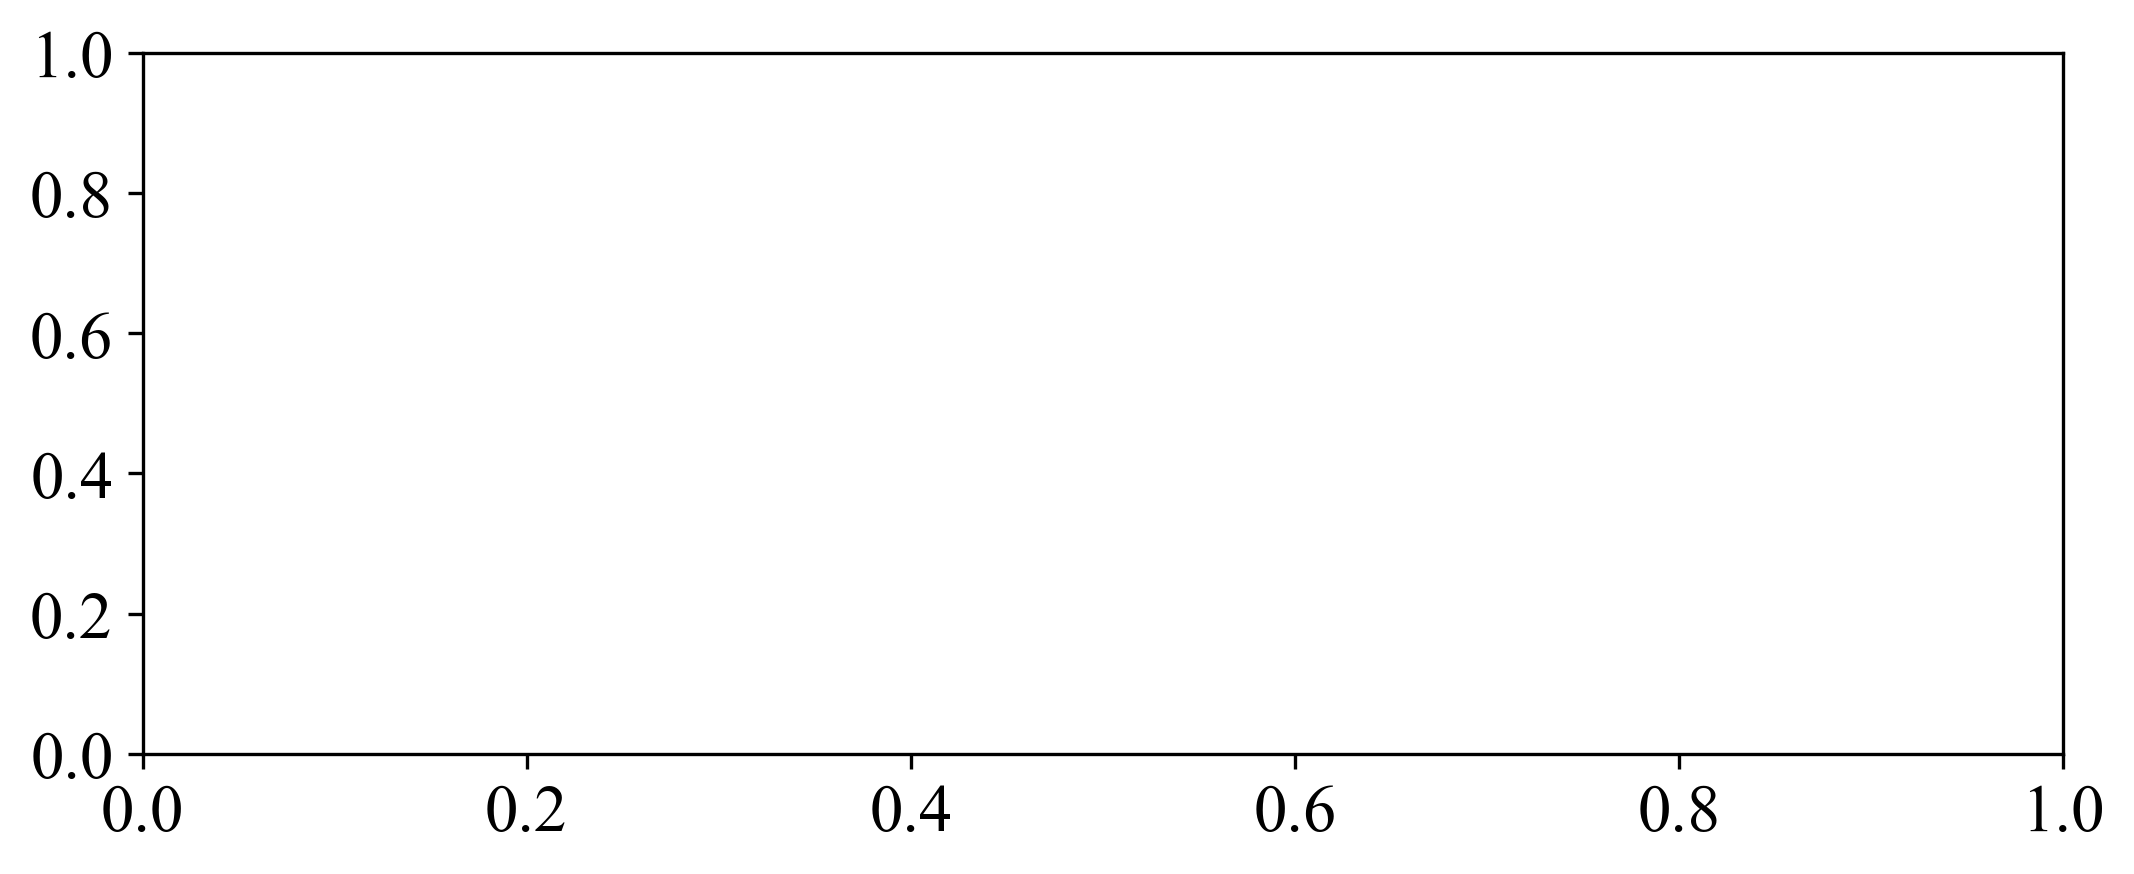

In [42]:
fig, ax = plt.subplots(
    figsize=(7, 14 / 5), ncols=1, nrows=1, constrained_layout=True, dpi=300
)

In [43]:
labels_name_a = [
    "ModelA\n8DP",
    "ModelA\n8TP",
    "ModelB\n8TP",
    "ModelA\n2DP$\\times$8TP",
]

In [44]:
# MFU
data_a = {
    labels_name_a[0]: [41.0, 34.2, 0, 44.4],  # modela 8DP
    labels_name_a[1]: [26.2, 36.8, 0, 43.6],  # modela 8TP
    labels_name_a[2]: [30.1, 39.6, 0, 49.4],  # modelb 8TP
    labels_name_a[3]: [39.6, 37.3, 0, 42.6],  # modela 2DP 8TP
}

In [45]:
for value in data_a.values():
    value[1] = (value[0] + value[2]) / 2 + (random.uniform(-10, 10) / 5)

In [46]:
legend_labels = [
    "Megatron-LM",
    "XLA",
    "Lynx with Estimation Method under XLA",
    "Lynx",
]

In [47]:
bar_width = 0.2
group_spaing = 0.15

group_positions = {}
current_pos = 0

x_label_cnt = len(data_a.keys())
x_label_group_cnt = 4

for idx in range(x_label_cnt):
    group_positions[idx] = []
    for _ in range(x_label_group_cnt):
        group_positions[idx].append(current_pos)
        current_pos += bar_width
    current_pos += group_spaing

group_centers = {}
for idx, positions in group_positions.items():
    group_centers[idx] = sum(positions) / len(positions)

In [48]:
label_set = set()
for idx, (x_label, y_data) in enumerate(data_a.items()):
    positions = group_positions[idx]
    tmp_min = sorted(y_data)[-2]
    vv = random.uniform(tmp_min, y_data[3])
    y_data[2] = vv

    for i, (pos, value, color, edgecolor, hatch, label) in enumerate(
        zip(
            positions,
            y_data,
            colors,
            edgecolors,
            hatches,
            legend_labels,
        )
    ):
        if label in label_set:
            local_label = None
        else:
            local_label = label
            label_set.add(local_label)

        ax.bar(
            pos,
            value,
            width=bar_width,
            color=color,
            label=local_label,
            hatch=hatch,
            edgecolor=edgecolor,
        )

ax.set_xticks(list(group_centers.values()))
ax.set_xticklabels(list(data_a.keys()))

ax.set_ylim(0, 100)
ax.set_yticks([0, 50, 100])
ax.set_yticklabels(["0", "50", "100"], rotation=90, ha="center", va="center")

ax.tick_params(axis="x", bottom=False, labelsize=g_label_fontsize - 4, pad=1)
ax.tick_params(axis="y", left=True, labelsize=g_label_fontsize, pad=5)
ax.set_ylabel("MFU (%)", fontsize=g_label_fontsize)

Text(13.333333333333346, 0.5, 'MFU (%)')

In [49]:
fig.legend(
    ncol=1,
    loc="upper center",
    frameon=False,
    shadow=False,
    bbox_to_anchor=(0.43, 0.94),
    fontsize=g_label_fontsize - 2,
)

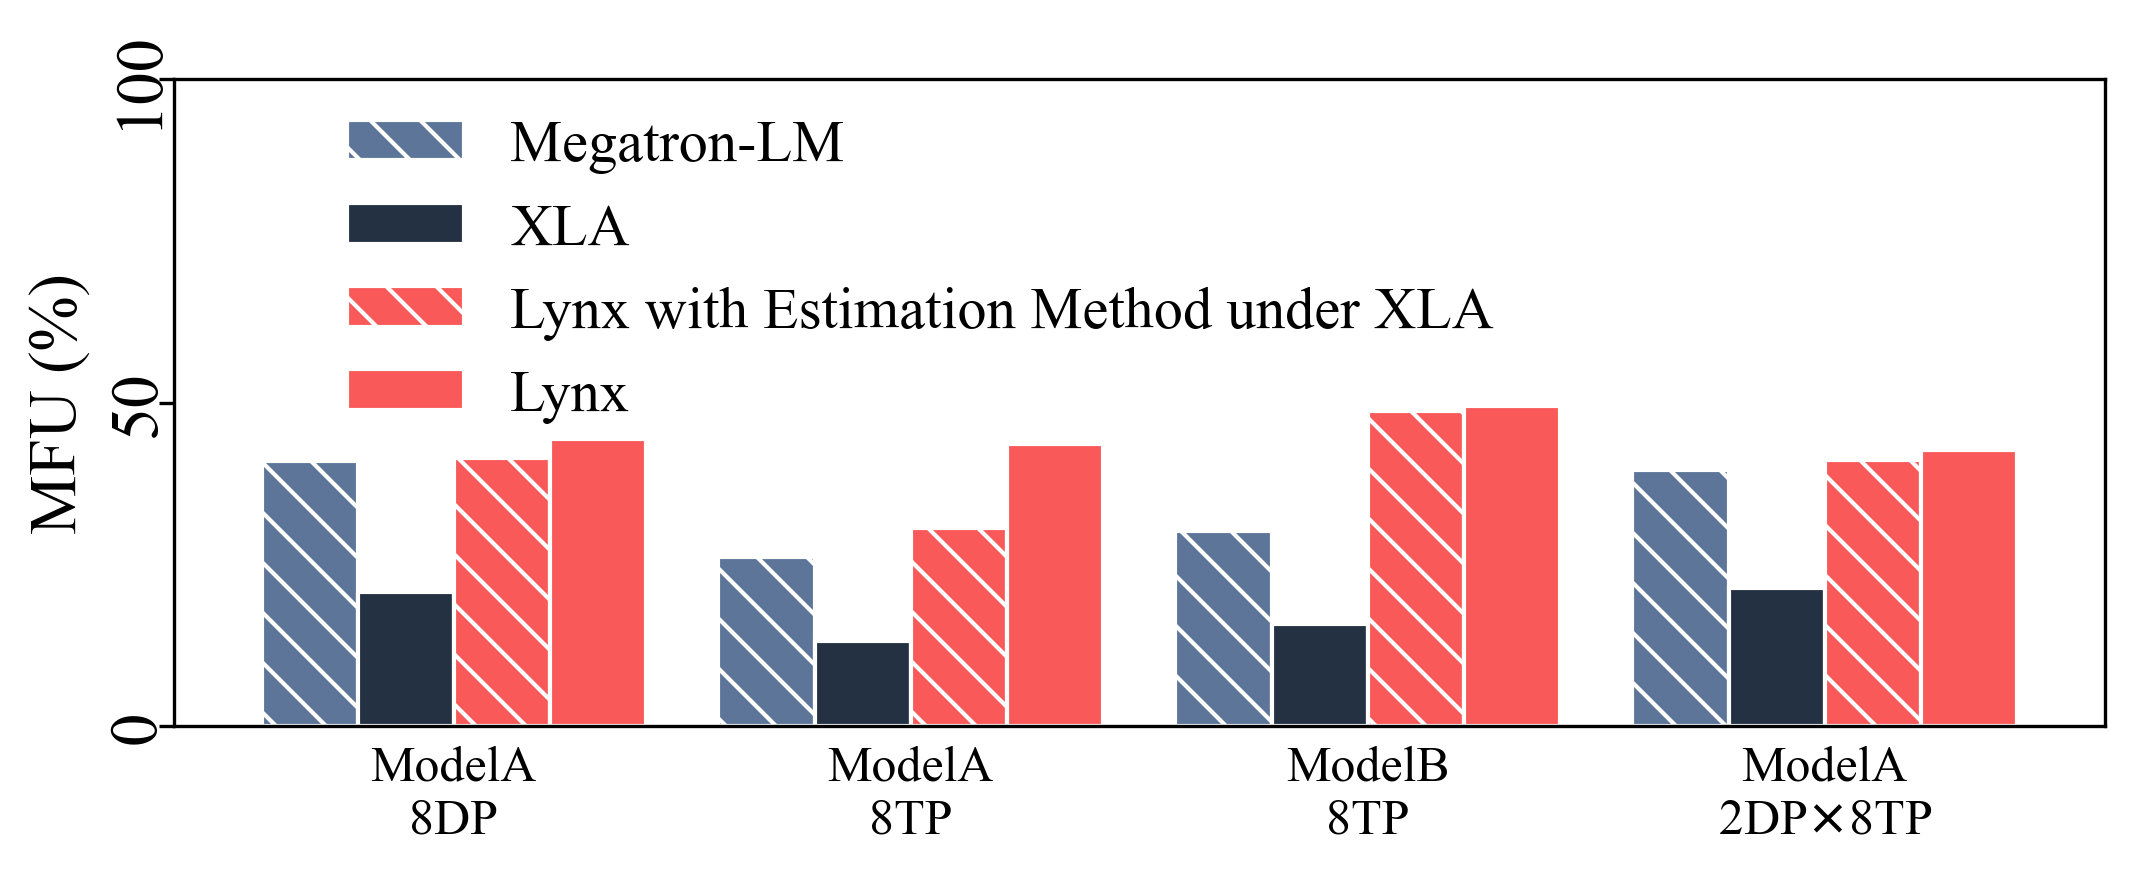

In [50]:
fig.savefig("runtime_feedback.pdf", bbox_inches="tight", dpi=1000)
fig